# Libraries

Import and install necessary libraries

In [ ]:
!pip install opencv-python==4.7.0.72
!apt update
!apt install ffmpeg libsm6 libxext6 -y
!pip install opencv-python
!pip install --upgrade pip
!pip install albumentations==1.3.0
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 25.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,909 kB]
Get:5 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [487 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,788 B]
Fetched 8,618 kB in 2s (5,208 kB/s)



All packages are up to date.



libsm6 is already the newest version (2:1.2.3-1).
libsm6 set to manually installed.
libxext6 is already the newest version (2:1.3.3-1+b2).
libxext6 set to manually installed.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libasound2
  

# Load dataset

Integrate google drive folder containing data set to notebook

In [ ]:
!ls /datasets/data/vid_frame

Test  Train


# Data Pre-processing

At this stage, the dataset undergoes some pre-processing steps. 

Create Frames: After successfully loading the dataset, write a function to load video data and convert data to picture frames and save frames into a new folder.

Labeling: After creating frames, the frames are labeled accordingly 

Arrays: convert frames to numpy arrays and resize

In [ ]:
# import cv2 
# import os

# def saving_video_frames(video_dir):
#     count = 0
#     for vid_folder in os.listdir(video_dir):
#         vid_folder_paths = os.path.join(video_dir, vid_folder)
#         for video in os.listdir(vid_folder_paths):
#             vid_path = os.path.join(vid_folder_paths, video)
#             cap = cv2.VideoCapture(vid_path)
#             while cap.isOpened():
#                 ret, frame = cap.read()
#                 if ret == False:
#                     break
#                 if not os.path.exists(os.path.join('/datasets/data/ASL_data/vid_frame', vid_folder)):
#                     os.makedirs(os.path.join('/datasets/data/ASL_data/vid_frame', vid_folder))
#                 cv2.imwrite(os.path.join(os.path.join('/datasets/data/ASL_data/vid_frame', vid_folder), 'frame'+str(count)+'.jpg'), frame)
#                 count += 1




# testing = saving_video_frames('/datasets/data/ASL_data/sign_vid')
# testing

In [ ]:
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# train_generator = train_datagen.flow_from_directory(
#         '/datasets/data/ASL_data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='categorical')
# validation_generator = test_datagen.flow_from_directory(
#         '/datasets/data/ASL_data/test',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='categorical')

In [10]:
import os
import cv2
import numpy as np

train_path = "/datasets/data/vid_frame/Train"
test_path = "/datasets/data/vid_frame/Test/"
label_map = {"Comfortable": 0, "Care": 1, "Calm": 2, "Bored":3, "Beautiful":4, "Bad":5, "Annoy": 6, "Angry":7, "Afraid":8, "Admire":9}
#label_map = {"Comfortable": 0, "Bored": 1, "Annoy":2}
def load_data(path):
    X_data = []
    y_data = []
    for foldername in os.listdir(path):
        label = label_map[foldername]
        folderpath = os.path.join(path, foldername)
        for filename in os.listdir(folderpath):
            imagepath = os.path.join(folderpath, filename)
            image = cv2.imread(imagepath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (28, 28))
            X_data.append(image)
            y_data.append(label)
    X_data = np.array(X_data, dtype=np.float32)
    y_data = np.array(y_data, dtype=np.int32)
    return X_data, y_data

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1673, 28, 28)
y_train shape: (1673,)
X_test shape: (710, 28, 28)
y_test shape: (710,)


# Create Model

In [65]:
import tensorflow as tf
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters= 32,
                                      kernel_size=6, 
                                      padding="same", 
                                      activation="relu", 
                                      input_shape=[28, 28, 1]))
classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                          strides=3, 
                                          padding='valid'))
classifier.add(tf.keras.layers.Conv2D(filters= 32, 
                                      kernel_size=6, 
                                       padding="same", 
                                       activation="relu"))

classifier.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                          strides=3, 
                                          padding='valid'))
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(units= 128, 
                                      activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.40))
classifier.add(tf.keras.layers.Dense(units= 96, activation='relu'))
#classifier.add(tf.keras.layers.Dropout(0.20))
#classifier.add(tf.keras.layers.Dense(units=64, activation='relu'))
#classifier.add(tf.keras.layers.BatchNormalization())
classifier.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [66]:
classifier.compile(optimizer = tf.keras.optimizers.Adagrad(), 
                    loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                    metrics = ['accuracy'])

In [61]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        1184      
                                                                 
 batch_normalization_17 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 32)          36896     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                     

In [67]:


model = classifier.fit(
         X_train, y_train,
          steps_per_epoch= 20,
          batch_size = 32,
          epochs= 70,
          validation_data=(X_test,y_test))
          #validation_steps=20)
        


Epoch 1/70
20/20 [==============================] - 2s 79ms/step - loss: 2.1194 - accuracy: 0.2750 - val_loss: 2.3291 - val_accuracy: 0.1704
Epoch 2/70
20/20 [==============================] - 1s 70ms/step - loss: 1.3876 - accuracy: 0.5672 - val_loss: 2.0768 - val_accuracy: 0.3451
Epoch 3/70
20/20 [==============================] - 1s 70ms/step - loss: 0.7878 - accuracy: 0.7844 - val_loss: 1.9551 - val_accuracy: 0.4183
Epoch 4/70
20/20 [==============================] - 1s 70ms/step - loss: 0.4972 - accuracy: 0.8547 - val_loss: 2.0577 - val_accuracy: 0.5014
Epoch 5/70
20/20 [==============================] - 1s 73ms/step - loss: 0.3447 - accuracy: 0.9062 - val_loss: 2.1826 - val_accuracy: 0.4451
Epoch 6/70
20/20 [==============================] - 1s 72ms/step - loss: 0.1889 - accuracy: 0.9514 - val_loss: 2.3050 - val_accuracy: 0.4620
Epoch 7/70
20/20 [==============================] - 1s 73ms/step - loss: 0.1833 - accuracy: 0.9469 - val_loss: 2.4237 - val_accuracy: 0.4000
Epoch 8/70
20

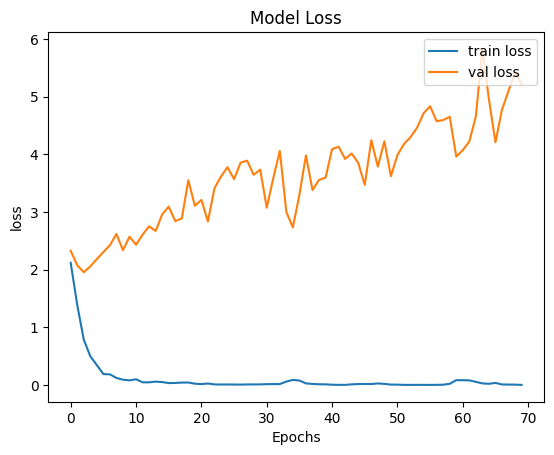

In [69]:
plt.plot(model.history["loss"])
plt.plot(model.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(["train loss", "val loss"], loc = "upper right")
plt.show()

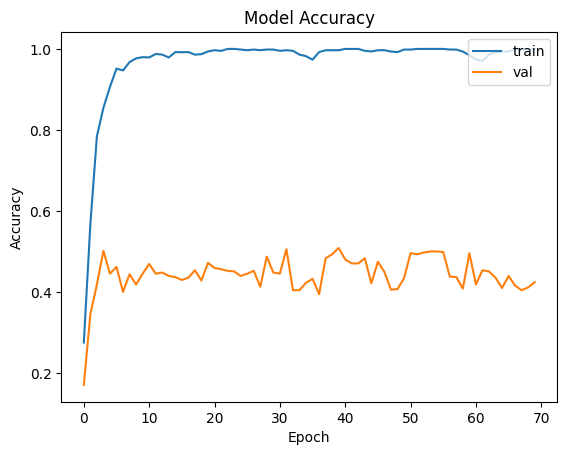

In [68]:
import matplotlib.pyplot as plt
plt.plot(model.history["accuracy"])
plt.plot(model.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc = "upper right")
plt.show()

In [ ]:
classifier.save('my_model12.h5')

In [ ]:
from tensorflow.keras.models import load_model
saved_model = load_model('my_model11.h5')

In [ ]:
y_pred = saved_model.predict(X_test)

23/23 [==============================] - 0s 8ms/step


In [ ]:
loss, accuracy = saved_model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

23/23 [==============================] - 0s 8ms/step - loss: 2.2565 - accuracy: 0.3465
Test loss: 2.2564923763275146
Test accuracy: 0.3464788794517517


The next block of code is an attempt at the LSTM algorithm model 

In [98]:


# Compile the model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on your dataset
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

# Save the model
model2.save('asl_lstm_model5.h5')


Epoch 1/50
10/10 [==============================] - 6s 477ms/step - loss: 1.2115 - accuracy: 0.4503 - val_loss: 1.1021 - val_accuracy: 0.3750
Epoch 2/50
10/10 [==============================] - 4s 413ms/step - loss: 0.8365 - accuracy: 0.6192 - val_loss: 1.0853 - val_accuracy: 0.1484
Epoch 3/50
10/10 [==============================] - 4s 420ms/step - loss: 0.6401 - accuracy: 0.7417 - val_loss: 1.1644 - val_accuracy: 0.1484
Epoch 4/50
10/10 [==============================] - 4s 411ms/step - loss: 0.4625 - accuracy: 0.8311 - val_loss: 1.7200 - val_accuracy: 0.3750
Epoch 5/50
10/10 [==============================] - 4s 420ms/step - loss: 0.3974 - accuracy: 0.8675 - val_loss: 1.9363 - val_accuracy: 0.3516
Epoch 6/50
10/10 [==============================] - 4s 411ms/step - loss: 0.3268 - accuracy: 0.8808 - val_loss: 2.3359 - val_accuracy: 0.1562
Epoch 7/50
10/10 [==============================] - 4s 411ms/step - loss: 0.2540 - accuracy: 0.9007 - val_loss: 1.9222 - val_accuracy: 0.2500
Epoch 

# Evaluation Metrics

In [34]:
import matplotlib.pyplot as plt
history = classifier.fit(X_train, y_train,validation_data= (X_test,y_test), epochs = 50)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"], loc = "upper right")
plt.show()

Epoch 1/50
53/53 [==============================] - 7s 129ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 2.3419 - val_accuracy: 0.4634
Epoch 2/50
21/53 [==========>...................] - ETA: 3s - loss: 0.0102 - accuracy: 1.0000

KeyboardInterrupt: 

Epoch 1/100
10/10 [==============================] - 0s 42ms/step - loss: 0.0406 - accuracy: 0.9901 - val_loss: 0.6220 - val_accuracy: 0.7188
Epoch 2/100
10/10 [==============================] - 0s 42ms/step - loss: 0.0265 - accuracy: 0.9901 - val_loss: 0.6121 - val_accuracy: 0.7266
Epoch 3/100
10/10 [==============================] - 0s 35ms/step - loss: 0.0490 - accuracy: 0.9834 - val_loss: 0.6127 - val_accuracy: 0.7266
Epoch 4/100
10/10 [==============================] - 0s 42ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.6156 - val_accuracy: 0.7188
Epoch 5/100
10/10 [==============================] - 0s 37ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.6154 - val_accuracy: 0.7266
Epoch 6/100
10/10 [==============================] - 0s 36ms/step - loss: 0.0159 - accuracy: 0.9967 - val_loss: 0.6056 - val_accuracy: 0.7266
Epoch 7/100
10/10 [==============================] - 0s 43ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.5984 - val_accuracy: 0.7266
Epoch 

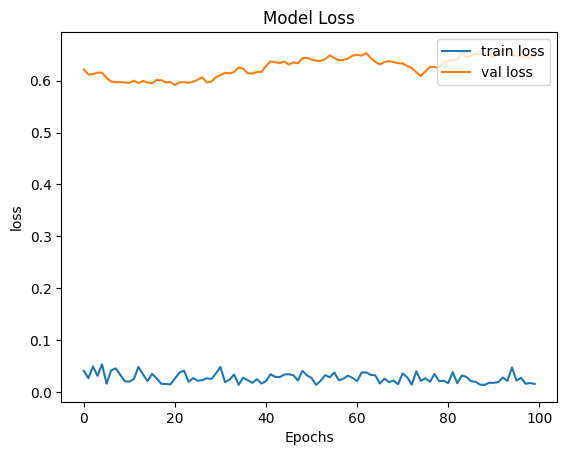

In [ ]:
history = classifier.fit(X_train, y_train,validation_data= (X_test,y_test), epochs = 70)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(["train loss", "val loss"], loc = "upper right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=38a13b2f-8e0c-478a-8dcd-2964e3fbb39f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>